In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_45600_U')

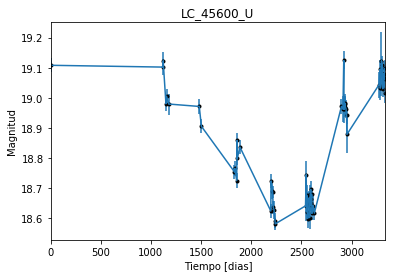

In [2]:
data = np.genfromtxt('LC_45600_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_45600_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

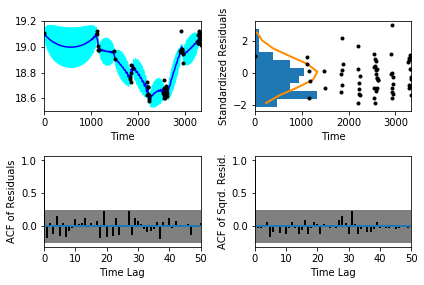

In [24]:
sample.assess_fit()

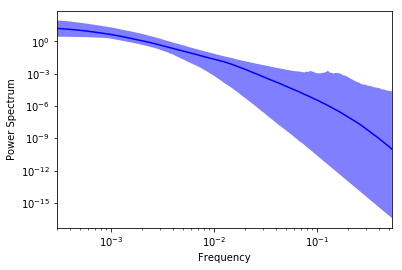

In [5]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [6]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_45600_U')

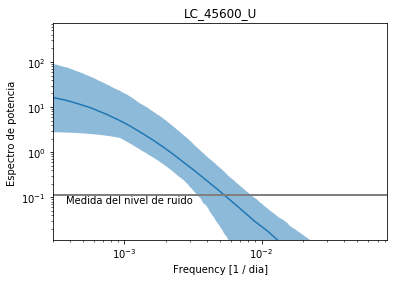

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_45600_U')

Text(0.5,1,'Prediccion , valor esperado LC_45600_U')

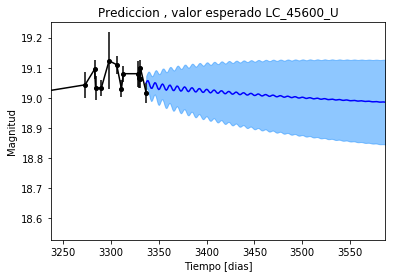

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_45600_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_45600_U')

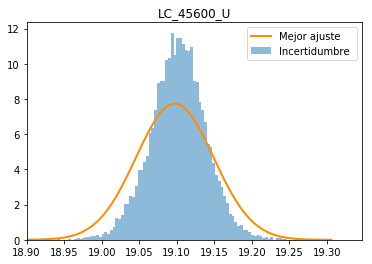

In [9]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_45600_U')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_U')

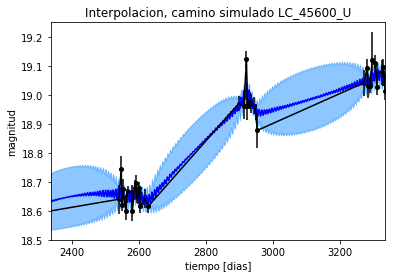

In [10]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_U')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_U')

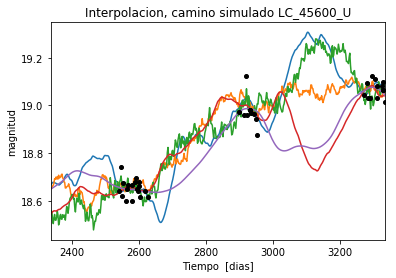

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_U')

In [12]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [13]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 336.400047707
Median: 0.013269379166
Standard deviation: 0.218287434701
68% credibility interval: [ 0.00109472  0.22450605]
95% credibility interval: [  4.12297281e-04   8.33617575e-01]
99% credibility interval: [  3.15612813e-04   1.01777022e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 270.330435015
Median: 0.00321431980093
Standard deviation: 0.114479809798
68% credibility interval: [ 0.00044156  0.03733162]
95% credibility interval: [  3.25253933e-04   4.15542777e-01]
99% credibility interval: [  3.03762405e-04   7.89520234e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 696.626927447
Median: 0.0252177219122
S

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 519.350394881
Median: 118.2254187
Standard deviation: 1.9669865931
68% credibility interval: [ 116.20767909  119.75076473]
95% credibility interval: [ 113.66616201  121.44208004]
99% credibility interval: [ 111.60161142  121.84312682]


In [15]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 326.408323135
Median: 0.729645182841
Standard deviation: 2.49409272647
68% credibility interval: [ 0.07130994  4.5152029 ]
95% credibility interval: [ 0.02400091  8.34896953]
99% credibility interval: [  0.01408338  12.20572373]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 308.956682035
Median: 1.19648875379
Standard deviation: 13.389875851
68% credibility interval: [  0.05850335  17.6039729 ]
95% credibility interval: [  3.36856361e

In [16]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310432
Median: 3.29045305787e-23
Standard deviation: 3.19913712581e+48
68% credibility interval: [  3.31817066e-69   5.47537766e-02]
95% credibility interval: [  4.59609492e-103   1.04690400e+002]
99% credibility interval: [  5.50449787e-107   1.28017490e+015]


In [17]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1218.11451489
Median: 18.9197452795
Standard deviation: 0.100889937406
68% credibility interval: [ 18.84307095  19.01598439]
95% credibility interval: [ 18.73856437  19.12999849]
99% credibility interval: [ 18.63646947  19.25021586]


In [18]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 360.664435834
Median: 0.0823359618267
Standard deviation: 0.314150264582
68% credibility interval: [ 0.          0.56053199]
95% credibility interval: [ 0.          0.99979149]
99% credibility interval: [ 0.          1.04210709]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 360.664435834
Median: 0.0823359618267
Standard deviation: 0.314150264582
68% credibility interval: [ 0.          0.56053199]
95% credibility interval: [ 0.          0.99979149]
99% credibility interval: [ 0.          1.04210709]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1213.50389458
Median: 0.0
Standard deviation: 0.00029498436874
68% cre

In [19]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 519.350394881
Median: 118.2254187
Standard deviation: 1.9669865931
68% credibility interval: [ 116.20767909  119.75076473]
95% credibility interval: [ 113.66616201  121.44208004]
99% credibility interval: [ 111.60161142  121.84312682]


In [20]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3391.60768952
Median: 0.0351501267995
Standard deviation: 0.0483746525877
68% credibility interval: [ 0.02113772  0.06695641]
95% credibility interval: [ 0.01573488  0.15194511]
99% credibility interval: [ 0.01230647  0.28077629]


In [21]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 327.482710658
Median: 1.30835104981
Standard deviation: 0.234619773977
68% credibility interval: [ 1.10403684  1.557611  ]
95% credibility interval: [ 0.87616611  1.80620462]
99% credibility interval: [ 0.73953485  1.93778056]


In [22]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 374.30605517
Median: 0.00103933060621
Standard deviation: 0.21780513773
68% credibility interval: [  2.22340845e-05   2.60100534e-02]
95% credibility interval: [  5.05297958e-07   5.30166615e-01]
99% credibility interval: [  2.25832188e-19   1.68089535e+00]


In [23]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 336.400047707
Median: (-0.0833739682112-1.97698047208j)
Standard deviation: 2.40359386246
68% credibility interval: [-1.41061312+0.j         -0.00687833-0.89319116j]
95% credibility interval: [ -5.23777370e+00+0.j          -2.59054022e-03-6.28187519j]
99% credibility interval: [ -6.39483892e+00+0.j          -1.98305379e-03-0.57652949j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 270.330435015
Median: (-0.0201961669458+0.0243427733434j)
Standard deviation: 2.10084025806
68% credibility interval: [-0.23456149+1.19575478j -0.00277438+0.02499017j]
95% credibility interval: [ -2.61093227e+00+3.33122579j  -2.04363073e-03+0.j        ]
99% credibility interval: [ -4.96070193e+00+3.83886307j  -1.90859548e-03+0.j        ]
Po